# Applied Data Science Capstone

# Introduction

Car accidents can occur all the time, however there are some conditions that may cause probabilities of having an accident arise due multiple variables.

This report has a purpose to develop a model for Seattle government to predict the probabilities of having a car accident and severity, based on different conditions such as weather or road conditions.

The information was provided by Seattle Police Department from 2004 to 2020.

# Business Problem

Identify the conditions that can cause future car accidents in order to alarm the people with anticipation to be aware and drive more carefully.

The avoidance of car accidents can result in many benefits:
- Save lives; or 
- Reduce costs in damage infrastructure; or
- Reduce cost from police and paramedics to attend each accident

# Data
The information comes from Seattle Police Department and recorded by Traffic Records and include Collisions at intersections or mid-blocks of a segment. The period information is from 2004 to May 2020.

The information is organized in a CSV file with 37 attributes and originally 194673 rows, the information is labeled and unbalanced. Additionally, a document with the description of each column were given.

Due to the labelled information, we can know the result of each record. We have selected the column SEVERITYCODE as Dependent variable. The possible values are:

- 1 – Property Damage Only Collision; and
- 2 – Injury Collision

In [1]:
#!pip install xlrd
#!pip install pandas
#!pip install matplotlib
#!pip install sklearn

import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  
import matplotlib.ticker as ticker
%matplotlib inline

df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
print("This data has the size of:")
print(df.shape)

This data has the size of:
(194673, 38)


For simplicity of the report, we shall consider the following:

1. The weather conditions
2. The time of day

The data we are using shall be reclassified as df2:

In [3]:
df2 = df[['ADDRTYPE','SEVERITYCODE','COLLISIONTYPE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM', 'JUNCTIONTYPE','WEATHER', 'ROADCOND', 'LIGHTCOND']];
df2.head()

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,Intersection,2,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),Overcast,Wet,Daylight
1,Block,1,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,Block,1,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,Block,1,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,Intersection,2,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),Raining,Wet,Daylight


In [4]:
df2.dtypes

ADDRTYPE         object
SEVERITYCODE      int64
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
INCDTTM          object
JUNCTIONTYPE     object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

In [5]:
# count missing value in each column 
missing_data = df2.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64



Based on the "count isnull() function" above, the following six columns containing missing data:

"ADDRTYPE": 1926 missing data
"COLLISIONTYPE": 4904 missing data
"JUNCTIONTYPE": 6329 missing data
"WEATHER": 5081 missing data
"ROADCOND": 5012 missing data
"LIGHTCOND": 5170 missing data

In all missing data, we set the missing as "Unknown"

In [6]:
df2['ADDRTYPE'].replace(np.nan, "Unknown", inplace=True)  
df2['COLLISIONTYPE'].replace(np.nan, "Unknown", inplace=True)  
df2['JUNCTIONTYPE'].replace(np.nan, "Unknown", inplace=True)  
df2['WEATHER'].replace(np.nan, "Unknown", inplace=True)  
df2['ROADCOND'].replace(np.nan, "Unknown", inplace=True)  
df2['LIGHTCOND'].replace(np.nan, "Unknown", inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


INCDTTM is the time of the accident, so is necessary convert that information to discrete values

- Midnight = 1 morning if hour is less than 6 and hour is more than 0;
- Morning = 2 if hour is more than or equal to 6 and hour is less than 12;
- Afternoon = 3 if hour more than or equal to 12 and hour is less than 18;
- Night = 4 if hour more than 24 and hour is less than or equal to 18

In [7]:
data_hour =  pd.to_datetime(df2['INCDTTM']).dt.hour 
data_hour.head()


data_hour2 = data_hour.apply(lambda x: 1 if (x>=0 and x<6) else( 2 if (x>=6 and x<12) else( 3 if(x>=12 and x<18) else 4)))  
df2['HOUR'] = data_hour2;

<ipython-input-7-b4c93e359c51>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['HOUR'] = data_hour2;


In [8]:
df3 = df2[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']];
df3 = pd.concat([df3,pd.get_dummies(df2['ADDRTYPE'])], axis=1)
df3 = pd.concat([df3,pd.get_dummies(df2['COLLISIONTYPE'])], axis=1) 
df3 = pd.concat([df3,pd.get_dummies(df2['JUNCTIONTYPE'])], axis=1)
df3 = pd.concat([df3,pd.get_dummies(df2['WEATHER'])], axis=1)
df3 = pd.concat([df3,pd.get_dummies(df2['ROADCOND'])], axis=1) 
df3 = pd.concat([df3,pd.get_dummies(df2['LIGHTCOND'])], axis=1) 
df3.drop(columns=['Other','Unknown'], inplace = True)
df3.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,Alley,Block,Intersection,Angles,Cycles,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,0,0,2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2,0,0,2,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,4,0,0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,3,0,0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,2,0,0,2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [9]:
#!pip install seaborn
#!pip install conda

# The weather conditions

Surprisingly, there are a greater number of accidents when the day is clear.

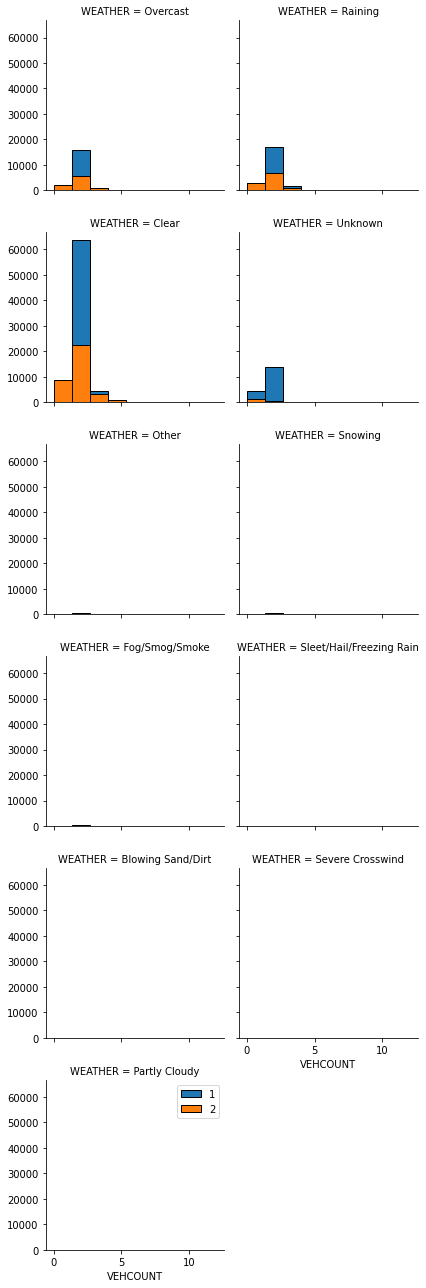

In [11]:
import seaborn as sns

bins = np.linspace(df2.VEHCOUNT.min(), df2.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df2, col="WEATHER", hue="SEVERITYCODE", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# The time of day

In the next figure, we shall observe that a higher number of accidents was reported during the afternoon.

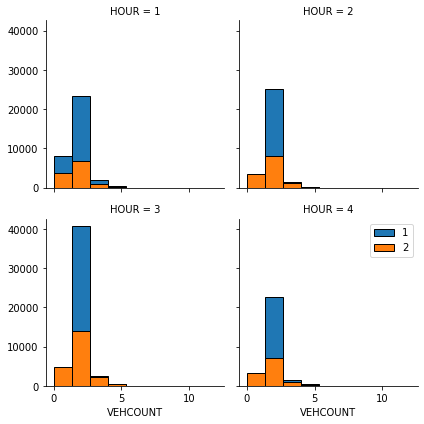

In [12]:
bins = np.linspace(df2.VEHCOUNT.min(), df2.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df2, col="HOUR", hue="SEVERITYCODE", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Methods of Classifications
We have compared the result using this methods.

1. Linear regression
2. Decision Tree

In [13]:
from sklearn import preprocessing

df3.columns
X = df3[[
       'Alley', 'Block', 'Intersection', 'Angles', 'Cycles', 'Head On',
       'Left Turn', 'Parked Car', 'Pedestrian', 'Rear Ended', 'Right Turn',
       'Sideswipe', 'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction',
       'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast',
       'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil',
       'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk']]
X[0:5]

y = df3['SEVERITYCODE'].values
y[0:5]

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.06223095, -1.36876932,  1.41129279,  2.14811072, -0.16915004,
        -0.10249953, -0.27517219, -0.57196238, -0.18744809, -0.46074827,
        -0.12417149, -0.32510694, -0.10437651,  1.44892892, -0.2408193 ,
        -0.36412936, -0.92535062, -0.02921369, -0.01696304, -1.15340914,
        -0.05414257,  2.45445634, -0.00506801, -0.45298634, -0.011333  ,
        -0.02409974, -0.06841713, -1.33213439, -0.07905204, -0.01813462,
        -0.01963186, -0.07200071, -0.02431221,  1.76085874, -0.08920831,
        -0.07872239, -0.576075  , -0.00751719, -0.1141037 ,  0.82233559,
        -0.17682024],
       [-0.06223095,  0.73058329, -0.70857019, -0.46552535, -0.16915004,
        -0.10249953, -0.27517219, -0.57196238, -0.18744809, -0.46074827,
        -0.12417149,  3.07591099, -0.10437651, -0.69016498, -0.2408193 ,
        -0.36412936,  1.08067145, -0.02921369, -0.01696304, -1.15340914,
        -0.05414257, -0.4074222 , -0.00506801,  2.2075721 , -0.011333  ,
        -0.02409974, -0.06841

In [14]:
X1 = X[0:50000];
y1 = y[0:50000];
# split the train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size=0.25, random_state=4)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhat = LR.predict(X_test)

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
prec_lr = f1_score(y_test, yhat, average='weighted')

In [17]:
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [18]:
decTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
from sklearn.metrics import f1_score
predTree = decTree.predict(X_test)
prec_dt = f1_score(y_test, predTree, average='weighted')

# Results

In [20]:
r = {'linear regresion': [prec_lr], 'decision tree': [prec_dt]}
results = pd.DataFrame(data=r)
results

,linear regresion,decision tree
0,0.674835,0.66665


# Conclusion

Research has shown that there is a higher probability of serious accident when ROADCOND is dry, and when the weather is overcast, raining or clear. A linear regression model is built to predict the severity of an traffic accident.